In [1]:
# import packages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

### Mock data

In [83]:
std = pd.read_excel('input/mock_standard.xlsx')
# remove space at the end of species names
std['Species'] = std['Species'].str.strip()
std.head(2)

,Species,std_abundance
0,Faecalibacterium prausnitzii,14.77
1,Veillonella rogosae,19.94


In [121]:
# Metaplan
tax = pd.read_csv('input/mock_Metaplan.txt', sep='\t', names=["clade_name", "NCBI_tax_id",
                   "metaplane_abundance", "additional_species"], skiprows=4)

taxU = tax[tax['clade_name'].str.contains("s__")].copy()  
newR = taxU['clade_name'].str.split(pat='s__', expand=True)
taxU.loc[:, 'Species'] = newR[1].values  

data = taxU[['Species', 'metaplane_abundance']]

# change '_' to ' ' in species names
data['Species'] = data['Species'].str.replace('_', ' ')
# remove space at the end of species names
data['Species'] = data['Species'].str.rstrip()

mrg_met = pd.merge(data, std, on='Species', how='outer')

# if metaplane_abundance & std_abundance not null add value present in new column 'status'
mrg_met['status'] = mrg_met.apply(lambda x: 'detected' if pd.notnull(x['metaplane_abundance']) and pd.notnull(x['std_abundance']) else '', axis=1)
mrg_met['status'] = mrg_met.apply(lambda x: 'FP' if pd.notnull(x['metaplane_abundance']) and pd.isnull(x['std_abundance']) else x['status'], axis=1)
mrg_met['status'] = mrg_met.apply(lambda x: 'not detected' if pd.isnull(x['metaplane_abundance']) and pd.notnull(x['std_abundance']) else x['status'], axis=1)

# add new column abundane. if metaplane_abundance & std_abundance not null fill it with std_abundance value
mrg_met['abundance'] = mrg_met.apply(lambda x: x['std_abundance'] if pd.notnull(x['std_abundance']) else x['metaplane_abundance'], axis=1)

mrg_met.to_excel('results/mock_metaphlan.xlsx', index=False)
mrg_met.head(2)


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/2864558996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].str.replace('_', ' ')
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/2864558996.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].str.rstrip()


,Species,metaplane_abundance,std_abundance,status,abundance
0,Bacteroides fragilis,20.46364,8.33,detected,8.33
1,Escherichia coli,18.90745,8.71,detected,8.71


In [133]:
# Karaken + Braken
bra = pd.read_csv('input/mock.bracken', sep='\t')
# change column name 'name' to 'Species'
bra = bra.rename(columns={'name':'Species'})

mrg_bra = pd.merge(bra, std, on='Species', how='outer').sort_values(by='std_abundance')

# if metaplane_abundance & std_abundance not null add value present in new column 'status'
mrg_bra['status'] = mrg_bra.apply(lambda x: 'detected' if pd.notnull(x['fraction_total_reads']) and pd.notnull(x['std_abundance']) else '', axis=1)
mrg_bra['status'] = mrg_bra.apply(lambda x: 'FP' if pd.notnull(x['fraction_total_reads']) and pd.isnull(x['std_abundance']) else x['status'], axis=1)
mrg_bra['status'] = mrg_bra.apply(lambda x: 'not detected' if pd.isnull(x['fraction_total_reads']) and pd.notnull(x['std_abundance']) else x['status'], axis=1)

# add new column abundane. if metaplane_abundance & std_abundance not null fill it with std_abundance value
mrg_bra['abundance'] = mrg_bra.apply(lambda x: x['std_abundance'] if pd.notnull(x['std_abundance']) else x['fraction_total_reads'], axis=1)

mrg_bra.head(30)

,Species,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,std_abundance,status,abundance
3049,Clostridium perfringens,NaN,NaN,NaN,NaN,NaN,NaN,0.00009,not detected,0.00009
2655,Enterococcus faecalis,48771.0,S,139.0,5.0,144.0,0.00001,0.00110,detected,0.00110
1892,Salmonella enterica,94937.0,S,3524.0,276.0,3800.0,0.00021,0.00700,detected,0.00700
3048,Methanobrevibacter smithii,NaN,NaN,NaN,NaN,NaN,NaN,0.17000,not detected,0.17000
3050,Candida albicans,NaN,NaN,NaN,NaN,NaN,NaN,0.31000,not detected,0.31000
3051,Saccharomyces cerevisiae,NaN,NaN,NaN,NaN,NaN,NaN,0.32000,not detected,0.32000
869,Clostridioides difficile,43379.0,S,440455.0,15417.0,455872.0,0.02482,1.10000,detected,1.10000
2588,Akkermansia muciniphila,31376.0,S,235664.0,6900.0,242564.0,0.01320,1.62000,detected,1.62000
1137,Prevotella corporis,83824.0,S,1067949.0,66813.0,1134762.0,0.06177,6.26000,detected,6.26000
2447,Fusobacterium nucleatum,52191.0,S,27598.0,978.0,28576.0,0.00156,7.53000,detected,7.53000


In [19]:
# mOTUs
motus = pd.read_csv('input/mock.motus', sep='\t')
motus = motus[motus['unnamed sample'] > 0]
# slpit column by [
motus['taxa'] = motus['consensus_taxonomy'].str.split('[').str[0]
motus.head(3)

,consensus_taxonomy,unnamed sample,taxa
93,Escherichia coli [ref_mOTU_v3_00095],0.136332,Escherichia coli
97,Salmonella enterica [ref_mOTU_v3_00099],0.000466,Salmonella enterica
714,Clostridioides difficile [ref_mOTU_v3_00721],0.023751,Clostridioides difficile


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/2294177847.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=mrg_met, y='abundance', x='status', palette='Set2')


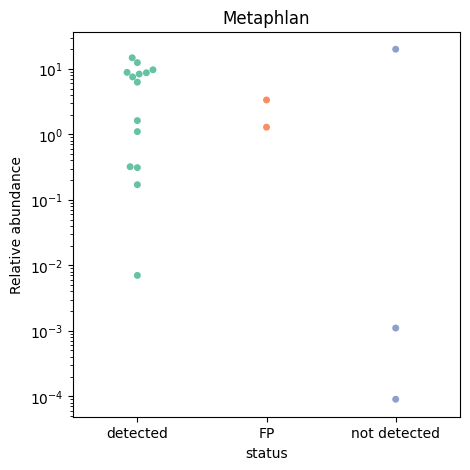

In [119]:
# fig size
plt.figure(figsize=(5, 5))

plt.yscale("log")
sns.swarmplot(data=mrg_met, y='abundance', x='status', palette='Set2')
plt.title('Metaphlan')
plt.ylabel('Relative abundance')

plt.savefig('results/Metaphlan.png', dpi=300, bbox_inches='tight')

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/2206168456.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=mrg_bra, y='abundance', x='status', palette='Set2')
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


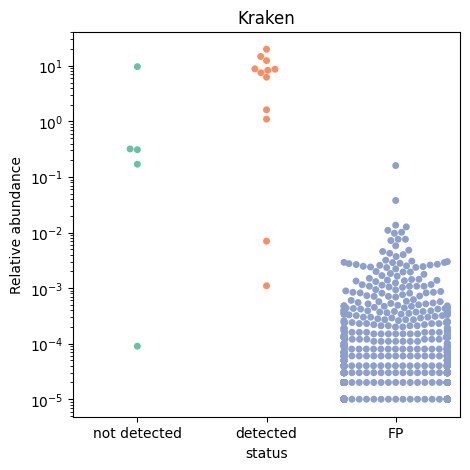

In [134]:
# fig size
plt.figure(figsize=(5, 5))

plt.yscale("log")
sns.swarmplot(data=mrg_bra, y='abundance', x='status', palette='Set2')
plt.title('Kraken with GTDB')
plt.ylabel('Relative abundance')

plt.savefig('results/Kraken.png', dpi=300, bbox_inches='tight')

### Regular plots

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/289756159.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].set_yscale("log")
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_18041/289756159.py:24: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  axs[1] = sns.swarmplot(data=mrg_met, y='abundance', x='status', palette='Set2')


Text(0.5, 1.0, 'mOTUs')

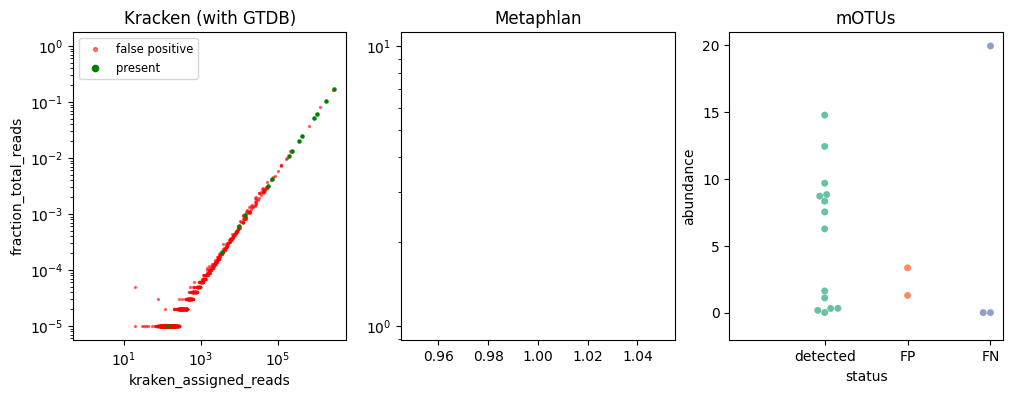

In [110]:

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
#fig.suptitle('Vertically stacked subplots \n')

# plot 1. Kraken
axs[0].plot(1, 1)
axs[0].set_title('Kracken (with GTDB)')

kr1 = bra[bra['status'] == 'present']
kr2 = bra[bra['status'] == 'not present']

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].scatter(x=kr2['kraken_assigned_reads'], y=kr2['fraction_total_reads'], color='red', label='false positive', alpha=0.5, s=2)
axs[0].scatter(x=kr1['kraken_assigned_reads'], y=kr1['fraction_total_reads'], color='green', label='present', alpha=1, s=5)

axs[0].set_xlabel('kraken_assigned_reads')
axs[0].set_ylabel('fraction_total_reads')
axs[0].legend(loc='upper left', fontsize='small', markerscale=2)

# plot 2. Metaphlan
axs[1].plot(1, -1)
axs[1].set_title('Metaphlan')
axs[1].set_yscale("log")
axs[1] = sns.swarmplot(data=mrg_met, y='abundance', x='status', palette='Set2')

# plot 3
axs[2].plot(-1, -1)
axs[2].set_title('mOTUs')


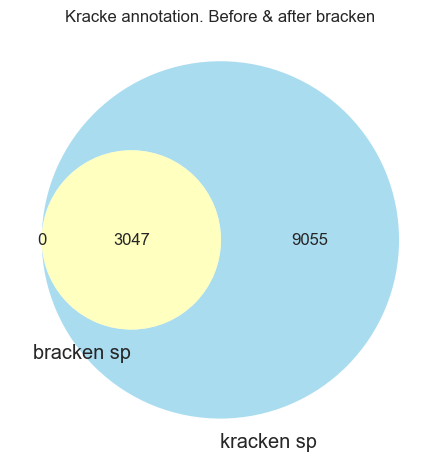

In [81]:
from matplotlib_venn import venn2

venn2([set(bra['name'].to_list()), 
       set(krep['name'].to_list())],
       set_labels=('bracken sp', 'kracken sp'), 
       set_colors=('orange', 'skyblue'), alpha = 0.7)

plt.title('Kracke annotation. Before & after bracken')
plt.tight_layout()
plt.savefig('results/kra_vs_bra.svg')